# Plot surface currents from SPURS-1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from scipy import fft
from scipy import stats
from scipy import signal
import scipy.io
import matplotlib
#import functions_12805 as tt #contains centeredFFT, band_avg, confid, confidence_interval, matlab2datetime
################
# This allows us to import Tom_tools
import sys
sys.path.append('../../Tom_tools/') # you may need to adjust this path

import Tom_tools_v1 as tt
################
%matplotlib widget


In [21]:
def run_avg1d(f, N):
    """
    Calculate N-point running average of the 1d array f.      
 
    Parameters
    ----------
    f : numeric
        So far I have only used a 1d Numpy.array.
    N : numeric
        Number of points for running average

    Returns
    -------
    result : numeric
        running average of f [same size as f].
        
    @author: jtomf
    jfarrar@whoi.edu
    """
    win = np.ones((N))
    sumwin = sum(win)
    # Initialize fz
    fz = np.empty(np.shape(f))
    fz= np.convolve(f, win, mode='same')
    fz[1:N] = np.nan
    fz[-1-N:-1] = np.nan
   

    return fz / sumwin


In [11]:

mat = scipy.io.loadmat('../data/external/SPURS1_aquadopp1961_JTF.mat')
# mat = scipy.io.loadmat('SPURS1_aquadopp1961_JTF.mat')

In [12]:
tt.matlab_whos(mat)

__header__ ()
__version__ ()
__globals__ (0,)
depth (1, 1)
east (9682, 1)
experiment (1,)
instdepth (1, 1)
lat (1, 1)
lon (1, 1)
magvar (1, 1)
None (1,)
mday (9682, 1)
meta (1, 1)
north (9682, 1)
note (0, 0)
note2 (1,)
press (9682, 1)
__function_workspace__ (1, 78456)


In [13]:
z = mat['depth'] 
mday = mat['mday']
try:
    u = mat['U']
    v = mat['V']
except:
    u = mat['east']
    v = mat['north']


In [14]:
time = [tt.matlab2datetime(i) for i in mday]

In [19]:
time[0:3]

[datetime.datetime(2012, 8, 27, 0, 59, 59, 999997),
 datetime.datetime(2012, 8, 27, 2, 0, 0, 3),
 datetime.datetime(2012, 8, 27, 3, 0)]

In [25]:
np.shape(u[:,0])

(9682,)

In [26]:
ulow = run_avg1d(u[:,0], 24*10)
vlow = run_avg1d(v[:,0], 24*10)

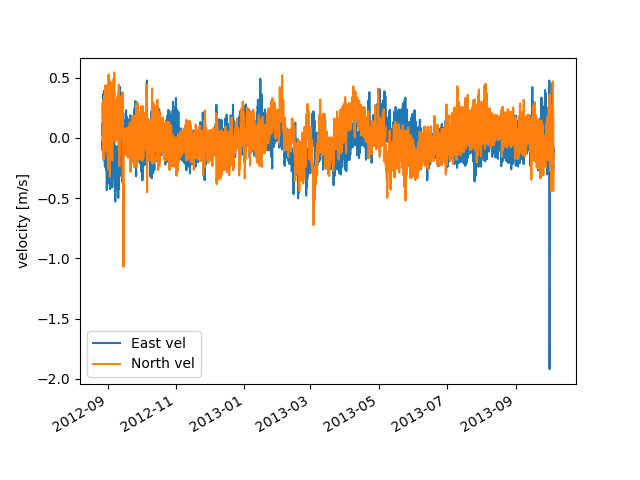

In [18]:
plt.figure()
plt.plot(time,u)
plt.plot(time,v)
fig = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('velocity [m/s]')
plt.legend(['East vel','North vel'])

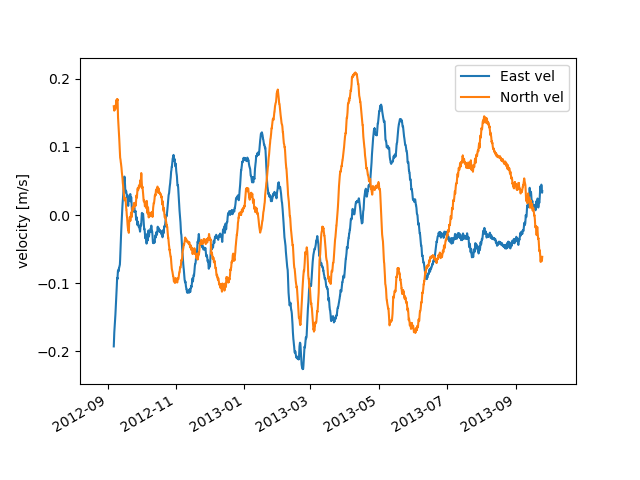

In [27]:
plt.figure()
plt.plot(time,ulow)
plt.plot(time,vlow)
fig = plt.gcf()
fig.autofmt_xdate()
plt.ylabel('velocity [m/s]')
plt.legend(['East vel','North vel'])